In [80]:
import numpy as np

In [81]:
a = np.array([1, 2, 3, 4, 5])

In [82]:
a

array([1, 2, 3, 4, 5])

In [83]:
type(a)

numpy.ndarray

In [84]:
2 * a

array([ 2,  4,  6,  8, 10])

In [85]:
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [86]:
a = np.arange(12)

In [87]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [88]:
a.shape

(12,)

In [89]:
a = np.arange(12).reshape((4, 3))

In [90]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [91]:
a * 2

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [92]:
a ** 2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [93]:
a.mean()

5.5

In [94]:
np.mean(a)

5.5

In [95]:
a.mean(axis=0)

array([4.5, 5.5, 6.5])

In [96]:
a.mean(axis=1)

array([ 1.,  4.,  7., 10.])

In [97]:
a = np.arange(15).reshape((5, 3))

In [98]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [99]:
import pandas as pd

In [100]:
columns = ['A', 'B', 'C']
# columns = list('ABC')

In [101]:
index = pd.date_range('20130101', periods=5, freq='B')

In [102]:
index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07'],
              dtype='datetime64[ns]', freq='B')

In [103]:
df = pd.DataFrame(a, index=index, columns=columns)

In [104]:
df

,A,B,C
2013-01-01,0,1,2
2013-01-02,3,4,5
2013-01-03,6,7,8
2013-01-04,9,10,11
2013-01-07,12,13,14


In [105]:
df.index.name = 'Date'

In [106]:
df

,A,B,C
Date,,,
2013-01-01,0,1,2
2013-01-02,3,4,5
2013-01-03,6,7,8
2013-01-04,9,10,11
2013-01-07,12,13,14


In [107]:
2 * df

,A,B,C
Date,,,
2013-01-01,0,2,4
2013-01-02,6,8,10
2013-01-03,12,14,16
2013-01-04,18,20,22
2013-01-07,24,26,28


In [108]:
df.sum()

A    30
B    35
C    40
dtype: int64

In [109]:
np.sum(df)

A    30
B    35
C    40
dtype: int64

In [110]:
np.mean(df)

c:\Users\nagar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


A    6.0
B    7.0
C    8.0
dtype: float64

In [111]:
df.mean()

A    6.0
B    7.0
C    8.0
dtype: float64

In [112]:
df['A'] + df['C']

Date
2013-01-01     2
2013-01-02     8
2013-01-03    14
2013-01-04    20
2013-01-07    26
Freq: B, dtype: int32

In [113]:
0.5 * df.A + 2 * df.B - df.C

Date
2013-01-01     0.0
2013-01-02     4.5
2013-01-03     9.0
2013-01-04    13.5
2013-01-07    18.0
Freq: B, dtype: float64

In [114]:
df['A'] > 5

Date
2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04     True
2013-01-07     True
Freq: B, Name: A, dtype: bool

In [115]:
df[df.A > 5]

,A,B,C
Date,,,
2013-01-03,6,7,8
2013-01-04,9,10,11
2013-01-07,12,13,14


In [116]:
df[df['A'] > 5].B

Date
2013-01-03     7
2013-01-04    10
2013-01-07    13
Freq: B, Name: B, dtype: int32

In [117]:
df['C'] > df['B']

Date
2013-01-01    True
2013-01-02    True
2013-01-03    True
2013-01-04    True
2013-01-07    True
Freq: B, dtype: bool

In [118]:
df[df['C'] > df['B']]

,A,B,C
Date,,,
2013-01-01,0,1,2
2013-01-02,3,4,5
2013-01-03,6,7,8
2013-01-04,9,10,11
2013-01-07,12,13,14


In [119]:
0.15 * df.A + df.B > df.C

Date
2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04     True
2013-01-07     True
Freq: B, dtype: bool

#### SMA Strategy Basics

In [120]:
raw = pd.read_csv('https://hilpisch.com/pyalgo_eikon_eod_data.csv',
                index_col=0, parse_dates=True).dropna()

In [121]:
raw.to_csv('pyalgo_eikon_eod_data.csv')

In [122]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [123]:
data = pd.DataFrame(raw['EUR='])

In [124]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [126]:
data['SMA_1'] = data.price.rolling(42).mean()

In [127]:
data['SMA_2'] = data['price'].rolling(252).mean()

In [128]:
data.tail()

,price,SMA_1,SMA_2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [129]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

C:\Users\nagar\AppData\Local\Temp\ipykernel_10500\1427899056.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


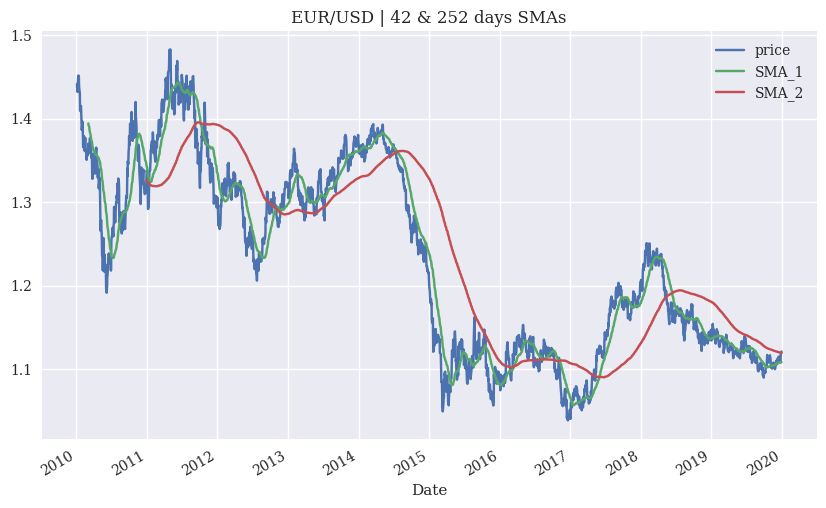

In [130]:
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6));

In [131]:
# long(ask): 1, short(bid): -1, do nothing: 0
data['position'] = np.where(data['SMA_1'] > data['SMA_2'], 1, -1)

In [132]:
data.dropna(inplace=True)

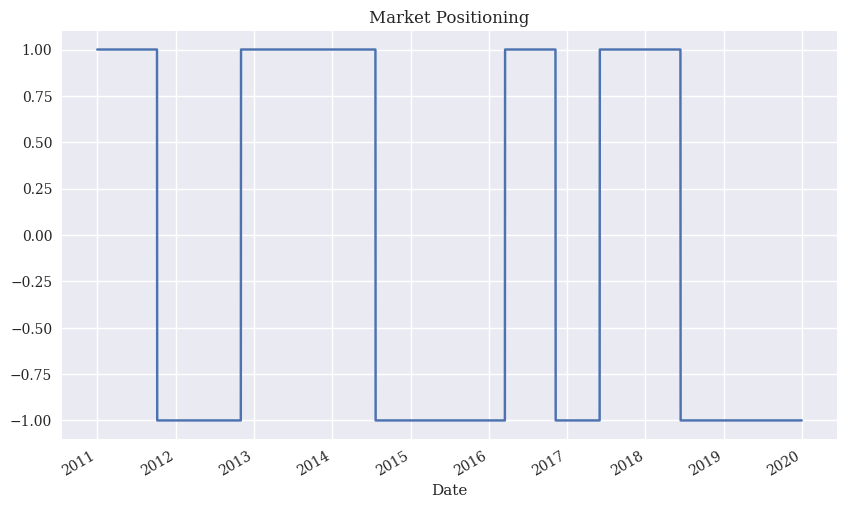

In [133]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6));

In [134]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

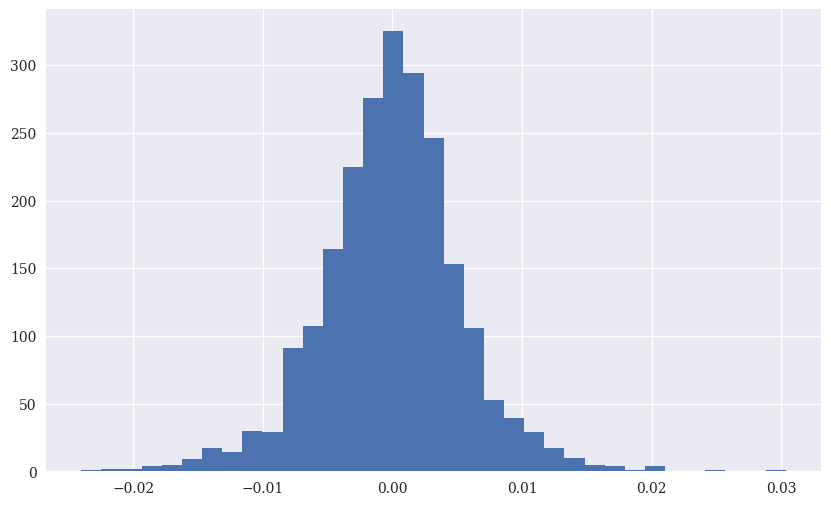

In [135]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [136]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [137]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [138]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

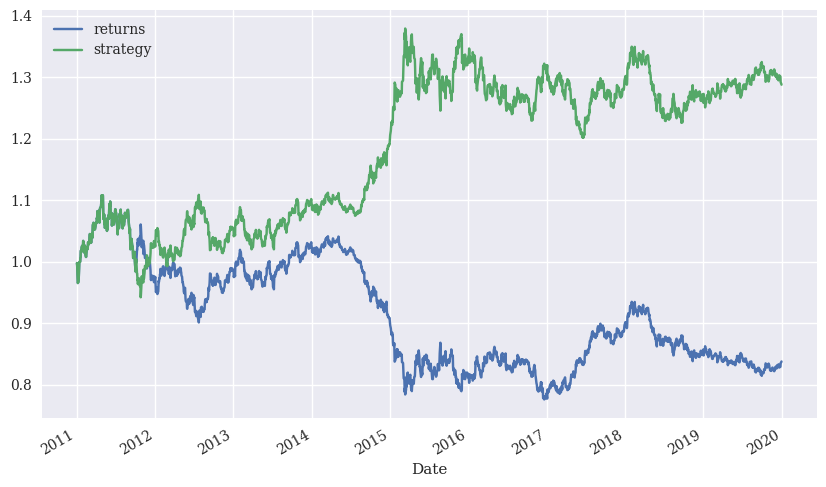

In [139]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [140]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [141]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [142]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [143]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

In [144]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [145]:
data['cummax'] = data['cumret'].cummax()

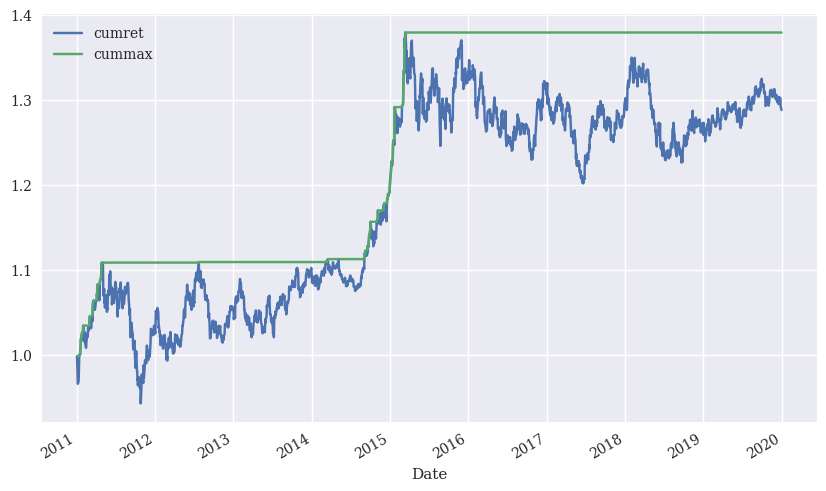

In [146]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [147]:
drawdown = data['cummax'] - data['cumret']

In [148]:
drawdown.max()

0.17779367070195895

In [149]:
temp = drawdown[drawdown == 0]

In [150]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [151]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [152]:
periods.max()

datetime.timedelta(days=596)

In [153]:
from sma_vec_backtester import SMAVectorBacktester as SMA

In [154]:
smabt = SMA('EUR=', 42, 252, '2010-1-1', '2019-12-31')

In [155]:
smabt.run_strategy()

(1.29, 0.45)

In [156]:
%%time
smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: total: 3.89 s
Wall time: 4.3 s


(array([ 48., 238.]), 1.5)

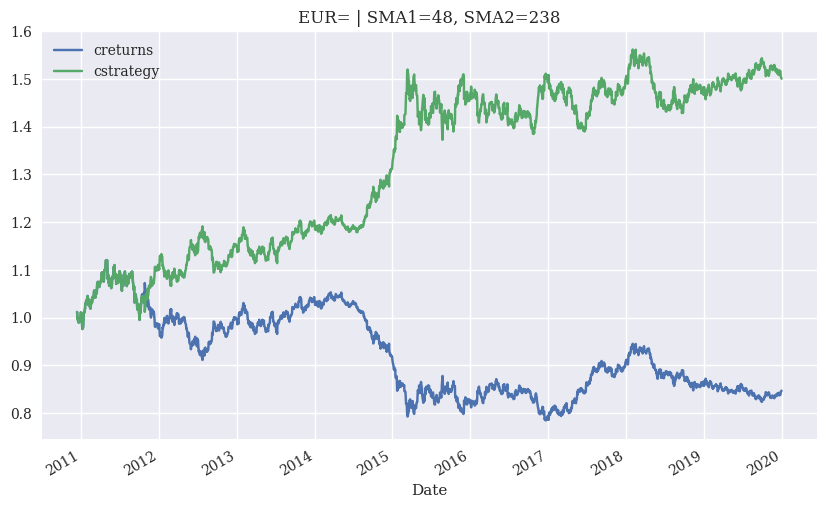

In [157]:
smabt.plot_results()